In [1]:
%pip install emoji
%pip install pythainlp
%pip install pandas
%pip install gensim
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Korra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Korra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Korra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Korra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Korra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pythainlp
import re
import pickle
import emoji
from pythainlp.corpus.common import thai_stopwords
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pythainlp import word_tokenize
import joblib

In [3]:
review_shopping = "https://raw.githubusercontent.com/PyThaiNLP/thai-sentiment-analysis-dataset/master/review_shopping.csv"
df = pd.read_csv(review_shopping, sep='\t', names=['text', 'sentiment'], header=None)

df.head()

,text,sentiment
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg
1,สินค้าด้อยคุณภาพ,neg
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg


<AxesSubplot: xlabel='sentiment'>

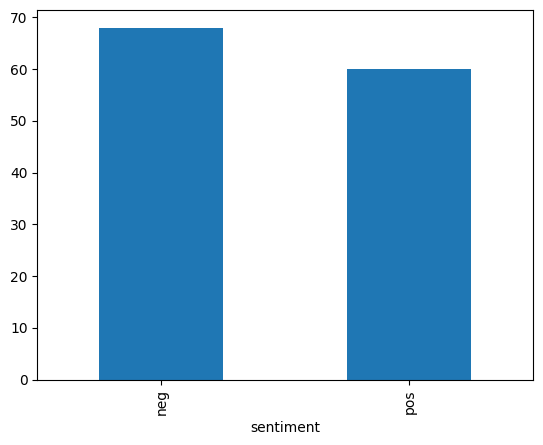

In [4]:
df['sentiment'].value_counts().plot.bar()

In [5]:
thai_stopwords = list(thai_stopwords())
thai_stopwords

['เสร็จกัน',
 'นับแต่นี้',
 'บาง',
 'กันดีกว่า',
 'รับ',
 'หมดกัน',
 'เนี่ยเอง',
 'เช่นดังว่า',
 'เหตุ',
 'พูด',
 'ยิ่ง',
 'ที่ได้',
 'แต่ถ้า',
 'ครานี้',
 'ช่วงท้าย',
 'ถูกๆ',
 'ตามด้วย',
 'แสดงว่า',
 'เอา',
 'นู่น',
 'หรือไร',
 'ช่วงแรก',
 'ถึงเมื่อ',
 'สูงสุด',
 'ส่วนนั้น',
 'ตาม',
 'ตามแต่',
 'พอควร',
 'ข้างต้น',
 'นับจากนี้',
 'แต่ก็',
 'จังๆ',
 'ไหน',
 'ช่วง',
 'ขวางๆ',
 'อื่น',
 'อาจ',
 'สําหรับ',
 'เป็นอันมาก',
 'แค่นี้',
 'ครั้งๆ',
 'แหละ',
 'ฝ่ายใด',
 'เหตุนั้น',
 'อันได้แก่',
 'แต่นั้น',
 'คราหนึ่ง',
 'เมื่อคราวที่',
 'ทั้งปวง',
 'จนขณะนี้',
 'ถึงแม้',
 'ผิด',
 'ซะจน',
 'คล้ายกับ',
 'ทั้งนั้นเพราะ',
 'อย่างไรก็ได้',
 'เมื่อคืน',
 'เขียน',
 'กำหนด',
 'เป็นด้วย',
 'จับ',
 'ได้แต่',
 'พวกมัน',
 'เป็นเพียงว่า',
 'ทั้งหลาย',
 'นำ',
 'ใช้',
 'หนึ่ง',
 'นำมา',
 'ซึ่งก็',
 'ซะจนถึง',
 'คราวไหน',
 'เหล่านี้',
 'เร็ว',
 'จวบ',
 'เป็นต้นมา',
 'ด้วยเหตุนี้',
 'เอง',
 'แก้ไข',
 'เยอะ',
 'จรดกับ',
 'บางที่',
 'ถึงเมื่อใด',
 'ตลอดมา',
 'นี่แหละ',
 'แต่ต้อง',
 'แต่เพียง',
 'ทั้งสิ้น',
 'ภาค

In [6]:
def text_process(text):
    review = emoji.demojize(text)
    review = "".join(u for u in review if u not in ("?", ".", ";", ":", "!", " ", "ๆ", "ฯ"))
    review = re.sub('[^A-Za-z0-9ก-๙]+', '', review)
    review = word_tokenize(review)
    review = " ".join(word for word in review)
    review = " ".join(word for word in review.split()
                     if word.lower not in thai_stopwords)
    return review
df['text_tokens'] = df['text'].apply(text_process)
df

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส...
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา...
...,...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,neg,สินค้า มีตำหนิ แย่มาก ไม่ ไหว เลย ถ้า มีตำหนิ ...
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg,เปราะบาง มาก ความแข็งแรง น้อย มัน ง่าย ต่อ การ...
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg,ขนส่ง ก็ ช้า สินค้า มีตำหนิ แพ็ค สินค้า ไม่ ดี...
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...,neg,สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10...


การแบ่งข้อมูลไว้ใช้สำหรับ train และ test

In [7]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']] # อาข้อมูล text ที่ถูกแปลงและแบ่งคำมาแล้วจากคอลัม text_tokens
y = df['sentiment'] # ผลเฉลย
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'แย่มาก': 340,
 'บิด': 148,
 'น้ำ': 141,
 'ไม่': 370,
 'แห้ง': 344,
 'เสียดาย': 307,
 'ตัง': 101,
 'มาก': 173,
 'อย่า': 260,
 'ทำ': 119,
 'แบบนี้': 332,
 'กับ': 11,
 'ใคร': 352,
 'อีก': 268,
 'นะ': 132,
 'ค่ะ': 61,
 'รับ': 196,
 'ของ': 26,
 'ไว': 373,
 'พนักงาน': 159,
 'ส่ง': 243,
 'ดีมาก': 89,
 'คุณภาพ': 56,
 'คุ้ม': 57,
 'ราคา': 200,
 'ซื้อ': 85,
 'แล้ว': 343,
 'ผิดหวัง': 155,
 'สินค้า': 237,
 'มี': 176,
 'สิน': 236,
 'ค้าส่ง': 63,
 'มา': 172,
 'แตกหัก': 325,
 'ยัง': 182,
 'ได้': 365,
 'ประกอบ': 152,
 'เลย': 302,
 'เสียความรู้สึก': 305,
 'วัสดุ': 218,
 'เหมือน': 315,
 'หมดอายุ': 250,
 'ของปลอม': 28,
 'เนื่อ': 289,
 'ครีม': 42,
 'ซอง': 82,
 '10': 0,
 'บาท': 147,
 'บรรจุภัณฑ์': 142,
 'ก๊อ': 24,
 'ป': 150,
 'ของจริง': 27,
 'ใน': 360,
 'ห้าง': 257,
 'ตังค์': 102,
 'ทิ้ง': 124,
 'สวย': 226,
 'ใช้งาน': 356,
 'ง่าย': 65,
 'ที่': 125,
 'สำคัญ': 235,
 'เร็ว': 301,
 'คะ': 47,
 'แพ๊': 338,
 'คดี': 38,
 'สภาพ': 222,
 'ดี': 87,
 'ถูก': 114,
 'ไม่ต้อง': 372,
 'ไป': 369,
 'เดิน': 281,
 'ช๊อป': 81,

In [9]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), index=X_train['text_tokens'])

,0,1,2,3,4,5,6,7,8,9,...,370,371,372,373,374,375,376,377,378,379
text_tokens,,,,,,,,,,,,,,,,,,,,,
แย่มาก บิด น้ำ ไม่ แห้ง เสียดาย ตัง มาก,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
รับ ของ ไว พนักงาน ส่ง ของ ดีมาก คุณภาพ คุ้ม ราคา,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ซื้อ แล้ว ผิดหวัง สินค้า ไม่ มี คุณภาพ,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
สิน ค้าส่ง มา แตกหัก ยัง ไม่ ได้ ประกอบ เลย เสียความรู้สึก,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
แย่มาก เสียดาย เงิน,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
สินค้า ใช้ ดี สีสด ใช้ จนถึง ทุกวันนี้,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
แพ็ค ของ ไม่ ดีมาก เลย ครับ ข้างใน กล่อง ฉีกขาด ไม่ สวย เลย,0,0,0,0,0,0,0,0,0,1,...,2,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [11]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.96      0.92      0.94        24
         pos       0.88      0.93      0.90        15

    accuracy                           0.92        39
   macro avg       0.92      0.93      0.92        39
weighted avg       0.93      0.92      0.92        39



In [12]:
my_text = 'แย่มาก'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['neg'], dtype=object)

In [13]:
# เขียน model_predict.pkl ขึ้นมา
import sklearn
print(sklearn.__version__)

path_model = 'LogisticRegression_model.pkl'
pickle.dump(lr, open(path_model, 'wb'))

1.3.2


In [14]:
path_model = 'X_train.pkl'
pickle.dump(X_train['text_tokens'], open(path_model, 'wb'))